Соревнование по регрессии (https://www.kaggle.com/competitions/urfuaieng2022reg2)

In [3]:
import numpy as np
import pandas as pd

# Заранее заготовленные методы

In [4]:
def compare_cols(df1, df2):
    '''
    Проверьте, какие столбцы являются общими для двух фреймов данных,
    и подсчитайте значения df1, присутствующие и отсутствующие в df2 (в общих столбцах).
    '''

    # Показать общие столбцы между фреймами данных
    # (a) Составьте списки столбцов для каждого фрейма данных
    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    # (b) Найдите одинаковые имена столбцов
    diffDict = set(df1Columns) & set(df2Columns)

    print('Общие колонки : ', diffDict, '\n')

    # (c) Составьте список из словаря
    diffList = list(diffDict)
    # (d) Убедитесь, что если значения в
    # каждый общий столбец совпадает в
    # двух фреймах данных
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Проверяем, присутствуют ли значения в обоих фреймах данных:')
        print(x, '\n')



In [5]:
def find_diff_values(df1, df2, col):
    '''
    Найти все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащите все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    # (b) осчитайте, сколько разных
    numberDiff = len(diff)

    print("Значения из df1 не в df2: " + str(diff))
    print("Количество пропущенных значений: " + str(numberDiff))

In [6]:
def print_diff_values(df1, df2, col):
    '''
    Показать все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащить все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))

    # Показать информацию обо всех значениях df1.col, отсутствующих в df2.col
    # (a) Составьте список недостающих значений
    missingList = list(diff)
    # (b) Найдите эти идентификаторы в df2
    missingDf = df1[df1[col].isin(missingList)]

    return missingDf

In [7]:
def get_cat_num_cols(df):
  '''
  Модифицированный метод из ноутбуков с лекций,
  Явный вывод числовых и категориальных колонок
  '''
  cat_columns = []
  num_columns = []

  for column_name in df.columns:
    if (df[column_name].dtypes == object):
      cat_columns +=[column_name]
    else:
      num_columns +=[column_name]
  print('categorical columns:\t ', cat_columns, '\n len = ', len(cat_columns))
  print('numerical columns:\t ', num_columns, '\n len = ', len(num_columns))
  return cat_columns, num_columns

In [8]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def get_metrics(model, X_train, y_train, X_test, y_test):
  '''
  Вывод MSE и R2 для обучающей и тестовой выборок
  '''
  y_prediction_train = model.predict(X_train)
  print('MSE train:', mse(y_train, y_prediction_train))

  y_prediction_test = model.predict(X_test)
  print('MSE test:', mse(y_test, y_prediction_test))

  y_prediction_train = model.predict(X_train)
  print('R2 train:', r2_score(y_train, y_prediction_train))

  y_prediction_test = model.predict(X_test)
  print('R2 test:', r2_score(y_test, y_prediction_test))

# Загружаем данные в pandas

Читаем данные через read_csv. При локальном запуске надо будет править пути к файлам

In [9]:
assessments = pd.read_csv('../../data/raw/assessments.csv')
courses = pd.read_csv('../../data/raw/courses.csv')
results = pd.read_csv('../../data/raw/studentAssessment.csv')
info = pd.read_csv('../../data/raw/studentInfo.csv')
registration = pd.read_csv('../../data/raw/studentRegistration.csv')
vle = pd.read_csv('../../data/raw/studentVle.csv')
materials = pd.read_csv('../../data/raw/vle.csv')

## Информация об оценках в модулях (assessments)

1. **code_module** – код модуля, которому принадлежит оценка;
2. **code_presentation** - код презентации, к которой относится оценка;
3. **id_assessment** – идентификационный номер оценки;
4. **assessment_type** – вид оценки: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam);
5. **date** – окончательная дата сдачи оценки (считается количество дней с момента начала модуля-презентации). Дата начала презентации имеет номер 0;
6. **weight** - вес оценки в %. Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100% (т.е. суммарно должно быть 200).

Выведем базовую информацию о датафрейме

In [10]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [11]:
assessments['id_assessment'] = assessments['id_assessment'].astype(object)

Выведем первые несколько записей

In [12]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Сгруппируем по модулям и сложим веса оценок. Экзамен + остальные оценки должны дать 200.

In [13]:
assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

/tmp/ipykernel_4712/994477157.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))


total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

GGG выбмвается, там 100, а должно быть 200.

Веса экзаменов в презентациях

In [14]:
assessments[assessments['assessment_type'] == 'Exam'].groupby(['code_module','code_presentation', 'assessment_type']).agg(total_weight = ('weight',sum))

/tmp/ipykernel_4712/2978641215.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments[assessments['assessment_type'] == 'Exam'].groupby(['code_module','code_presentation', 'assessment_type']).agg(total_weight = ('weight',sum))


total_weight
code_module code_presentation assessment_type              
AAA         2013J             Exam                    100.0
            2014J             Exam                    100.0
BBB         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
CCC         2014B             Exam                    200.0
            2014J             Exam                    200.0
DDD         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
EEE         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
FFF         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
GGG         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0

In [15]:
column = assessments[(assessments['assessment_type'] == 'CMA') & (assessments['code_module'] != 'GGG')]['weight']

unique, counts = np.unique(column, return_counts = True)

dict(zip(unique, counts))

{0.0: 28, 1.0: 15, 2.0: 3, 3.0: 3, 4.0: 2, 6.0: 1, 7.0: 2, 8.0: 4}

In [16]:
column = assessments[(assessments['assessment_type'] == 'TMA') & (assessments['code_module'] != 'GGG')]['weight']

unique, counts = np.unique(column, return_counts = True)

dict(zip(unique, counts))

{0.0: 1,
 5.0: 4,
 7.5: 1,
 9.0: 2,
 10.0: 8,
 12.5: 11,
 15.0: 3,
 16.0: 3,
 17.5: 2,
 18.0: 15,
 20.0: 13,
 22.0: 6,
 25.0: 15,
 28.0: 9,
 30.0: 2,
 35.0: 2}

Посмотрим задания в модуле GGG.

In [17]:
assessments[assessments['code_module'] == 'GGG'][['code_module', 'code_presentation', 'assessment_type', 'id_assessment']]\
.groupby(['code_module','code_presentation', 'assessment_type']).count()

id_assessment
code_module code_presentation assessment_type               
GGG         2013J             CMA                          6
                              Exam                         1
                              TMA                          3
            2014B             CMA                          6
                              Exam                         1
                              TMA                          3
            2014J             CMA                          6
                              Exam                         1
                              TMA                          3

Назначим новые веса модульным оценкам GGG


Поскольку CMA часто имеет вес 0, назначим общий вес 100 TMA.

In [18]:
assessments.loc[(assessments.code_module=='GGG') & (assessments.assessment_type=='TMA'),'weight'] = (100/3)
assessments.loc[(assessments.code_module=='GGG') & (assessments.assessment_type=='CMA'),'weight'] = (0)

Проверим, что сумма стала равна 100

In [19]:
assessments[assessments['code_module'] == 'GGG'].groupby(['code_module','code_presentation', 'assessment_type']).agg(weight_by_type = ('weight', sum))

/tmp/ipykernel_4712/3965949502.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments[assessments['code_module'] == 'GGG'].groupby(['code_module','code_presentation', 'assessment_type']).agg(weight_by_type = ('weight', sum))


weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0

Скорректируем вес экзаменов в CCC. Сейчас там 200, но должно быть 100

In [20]:
assessments.loc[(assessments.code_module=='CCC') & (assessments.assessment_type=='Exam'),'weight'] = (100/2)

Проверим, что суммарный вес оценок 200

In [21]:
assessments[assessments['code_module'] == 'GGG'].groupby(['code_module','code_presentation']).agg(total_weight = ('weight', sum))

/tmp/ipykernel_4712/295295805.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments[assessments['code_module'] == 'GGG'].groupby(['code_module','code_presentation']).agg(total_weight = ('weight', sum))


total_weight
code_module code_presentation              
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

## Результаты оценок студентов (results)

Файл содержит результаты оценок студентов. Если учащийся не сдает оценку, результат не записывается. Итоговые экзаменационные материалы отсутствуют, если результат оценивания не хранится в системе.

1. **id_assessment** – id оценки;
2. **id_student** – id студента;
3. **date_submitted** – дата оценки (количество дней с начала презентации модуля);
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

Выведем базовую информацию о датафрейме

In [22]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB


In [23]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

Выведем первые строки датафрейма

In [24]:
results.head()

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


Количество уникальных значений для каждого столбца

In [25]:
results.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
dtype: int64

## Регистрация студентов (registration)

Файл содержит информацию о времени регистрации студента на презентацию модуля.

1. **code_module** – код модуля;
2. **code_presentation** - код презентации;
3. **id_student** – id студента;
4. **date_registration** – дата регистрации студента на презентацию модуля (рассчитывается как дата презентации модуля - дата регистрации студента, может быть отрицательной, если студент зарегистрировался заранее).

Выведем базовую информацию о датафрейме

In [26]:
registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


In [27]:
registration['id_student'] = registration['id_student'].astype(object)

Выведем первые строки датафрейма

In [28]:
registration.head()

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


### Сравним наполнение датафреймов

Сравним assessments и results

In [29]:
compare_cols(assessments, results)

Общие колонки :  {'id_assessment'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
id_assessment
True     188
False     18
Name: count, dtype: int64 



Найдем недостающие 18 id_assessment

In [30]:
find_diff_values(assessments, results, 'id_assessment')

Значения из df1 не в df2: {30723, 1763, 34885, 15014, 37444, 14990, 30713, 37424, 15025, 34898, 37434, 40087, 34872, 40088, 15002, 1757, 30718, 34911}
Количество пропущенных значений: 18


In [31]:
print_diff_values(assessments, results, 'id_assessment')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,50.0
73,CCC,2014J,40088,Exam,NaN,50.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0


Сравним наполнение общих столбцов для registration и results.

In [32]:
compare_cols(registration, results)

Общие колонки :  {'id_student'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
id_student
True     26746
False     5847
Name: count, dtype: int64 



Для registration и results.

In [33]:
compare_cols(info, results)

Общие колонки :  {'id_student'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
id_student
True     26746
False     5847
Name: count, dtype: int64 



Получим все уникальные id и сравним списки

In [34]:
df1_ids = registration.id_student.unique()
df2_ids = info.id_student.unique()

diff = set(df1_ids).difference(set(df2_ids))
diff

set()

In [35]:
compare_cols(registration, info)

Общие колонки :  {'id_student', 'code_module', 'code_presentation'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
id_student
True    32593
Name: count, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
code_module
True    32593
Name: count, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
code_presentation
True    32593
Name: count, dtype: int64 



Проверим наличие участников длякоторых отсутствуют результаты оценок

In [36]:
info_not_in_results = print_diff_values(info, results, 'id_student')
info_not_in_results.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
44,AAA,2013J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,180,N
118,AAA,2013J,281589,M,North Western Region,HE Qualification,30-40%,0-35,0,60,N
125,AAA,2013J,292923,F,South East Region,A Level or Equivalent,90-100%,35-55,0,180,N
136,AAA,2013J,305539,F,Wales,Lower Than A Level,80-90%,0-35,0,120,N


## Информация о курсах (courses)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

Выведем базовую информацию о датафрейме

In [37]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [38]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Материалы в VLE (materials)

1. **id_site** - идентификационный номер материала;
2. **code_module** – идентификационный код модуля;
3. **code_presentation** - идентификационный код презентации;
4. **activity_type** – роль, связанная с материалом модуля;
5. **week_from** – неделя, с которой планируется использовать материал;
6. **week_to** – неделя, до которой планируется использовать материал.

Выведем базовую информацию о датафрейме

In [39]:
materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [40]:
materials['id_site'] = materials['id_site'].astype(object)

In [41]:
materials.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## Взаимодействие с VLE (vle)

1. **code_module** – идентификационный код модуля;
2. **code_presentation** - идентификационный код представления модуля;
3. **id_student** – уникальный идентификационный номер студента;
4. **id_site** - идентификационный номер материала VLE;
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации;
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

Выведем базовую информацию о датафрейме

In [42]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [43]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [44]:
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


## Демографическая информация (info)

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [45]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [46]:
info['id_student'] = info['id_student'].astype(object)

In [47]:
info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


# Объединение данных

## regisrtation + courses

Объединим информацию о модулях с регистрацией на модули.

Объединяем по столбцам code_module и code_presentation через inner join

In [48]:
registration_courses = pd.merge(registration, courses, on=['code_module', 'code_presentation'], how='inner')

registration_courses.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268


## regisrtation_courses + info

Добавим к полученному на предыдущем шаге демографическую информацию для каждого студента.

Объединяем по столбцам code_module, code_presentation и id_student через inner join

In [49]:
registration_courses_info = pd.merge(registration_courses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

registration_courses_info.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


## vle + materials

Объединим матриалы в VLE и информацию о взаимодействии студентов с VLE.

Объединяем по столбцам code_module и code_presentation и id_site через inner join

In [50]:
# Merge
materials_vle = pd.merge(vle, materials, on=['code_module', 'code_presentation', 'id_site'], how='inner')
# Drop
materials_vle.drop(columns=['week_from', 'week_to', 'date'], inplace=True)

materials_vle.head()

,code_module,code_presentation,id_student,id_site,sum_click,activity_type
0,AAA,2013J,28400,546652,4,forumng
1,AAA,2013J,28400,546652,1,forumng
2,AAA,2013J,28400,546652,1,forumng
3,AAA,2013J,28400,546652,8,forumng
4,AAA,2013J,30268,546652,3,forumng


In [51]:
#Общее количество дней взаимодействия студента
keys_act = ['code_module', 'code_presentation', 'id_student']
n_tot_days = vle.groupby(keys_act)['date'].nunique().to_frame().reset_index().rename(columns={'date': 'total_n_days'})
n_tot_days.head()

,code_module,code_presentation,id_student,total_n_days
0,AAA,2013J,11391,40
1,AAA,2013J,28400,80
2,AAA,2013J,30268,12
3,AAA,2013J,31604,123
4,AAA,2013J,32885,70


In [52]:
materials_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg(total_click = ("sum_click",sum))

/tmp/ipykernel_4712/380463505.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  materials_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg(total_click = ("sum_click",sum))


total_click
code_module code_presentation id_student             
AAA         2013J             11391               934
                              28400              1435
                              30268               281
                              31604              2158
                              32885              1034
...                                               ...
GGG         2014J             2640965              41
                              2645731             893
                              2648187             312
                              2679821             275
                              2684003             616

[29228 rows x 1 columns]

Получим общее количество кликов на учащегося за презентацию модуля.

In [53]:

total_click_per_student = materials_vle\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))\
.reset_index()

total_click_per_student.head()

/tmp/ipykernel_4712/908889991.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_click_per_student = materials_vle\


,code_module,code_presentation,id_student,total_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034


In [54]:
vle_grouped = vle.groupby(['code_module', 'code_presentation', 'id_student'])['date'].max().reset_index()

vle_courses = pd.merge(courses, vle_grouped, on=['code_module', 'code_presentation'], how='inner')

vle_courses['days_of_out'] = vle_courses['module_presentation_length'] - vle_courses['date']

vle_courses['late_submission_vle'] = vle_courses['days_of_out'] <= 0

vle_courses.drop(columns=['module_presentation_length', 'date'], inplace=True)
vle_courses

,code_module,code_presentation,id_student,days_of_out,late_submission_vle
0,AAA,2013J,11391,15,False
1,AAA,2013J,28400,29,False
2,AAA,2013J,30268,256,False
3,AAA,2013J,31604,4,False
4,AAA,2013J,32885,21,False
...,...,...,...,...,...
29223,GGG,2014B,2672138,6,False
29224,GGG,2014B,2677135,9,False
29225,GGG,2014B,2682002,5,False
29226,GGG,2014B,2689480,20,False


## assessments + results

Объединим информацию об оценках в модулях и результаты оценок студентов.

Объединяем по id_assessment через inner join

In [55]:
# merge
assessment_results = pd.merge(assessments, results, on=['id_assessment'], how='inner')
# Изменим порядок колонок
assessment_results = assessment_results[['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'date_submitted', 'weight', 'is_banked']]

assessment_results.head()

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0


In [56]:
assessment_results.isnull().sum()

id_student              0
code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
date_submitted          0
weight                  0
is_banked               0
dtype: int64

In [57]:
# Рассчитаем разницу между датами сдачи
assessment_results['submission_days'] = assessment_results['date_submitted'] - assessment_results['date']

# Создадим столбец, указывающий, была ли подача запоздалой или нет
assessment_results['late_submission'] = assessment_results['submission_days'] > 0

# Рассчитаем столбец с коэфициентом поздних сдач
assessment_results['weighted_score'] = assessment_results['weight']
assessment_results.loc[assessment_results['late_submission'], 'weighted_score'] = 0

# Создадим общий вес всех сдач по студентам
total_w_score = assessment_results.groupby(['id_student', 'code_module', 'code_presentation']).agg({
    'weighted_score': 'sum',
    'late_submission': 'mean'
}).reset_index()

total_w_score = total_w_score.rename(columns={'weighted_score': 'total_weighted_score', 'late_submission': 'late_submission_rate'})

In [58]:
total_w_score

,id_student,code_module,code_presentation,total_weighted_score,late_submission_rate
0,6516,AAA,2014J,100.0,0.000000
1,8462,DDD,2013J,30.0,0.333333
2,8462,DDD,2014J,50.0,0.000000
3,11391,AAA,2013J,100.0,0.000000
4,23629,BBB,2013B,5.0,0.750000
...,...,...,...,...,...
25838,2698257,AAA,2013J,70.0,0.400000
25839,2698535,CCC,2014B,22.0,0.750000
25840,2698535,EEE,2013J,72.0,0.250000
25841,2698577,BBB,2014J,100.0,0.000000


## Соединяем все полученные таблицы

In [59]:
merged = pd.merge(registration_courses_info, total_click_per_student, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0


In [60]:
merged = pd.merge(merged, n_tot_days, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,total_n_days
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0,40.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0,80.0
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0,12.0
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0,123.0
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0,70.0


In [61]:
merged = pd.merge(merged, total_w_score, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,total_n_days,total_weighted_score,late_submission_rate
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0,40.0,100.0,0.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0,80.0,70.0,0.4
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0,12.0,NaN,NaN
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0,123.0,100.0,0.0
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0,70.0,0.0,1.0


In [62]:
merged = pd.merge(merged, vle_courses, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,total_n_days,total_weighted_score,late_submission_rate,days_of_out,late_submission_vle
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0,40.0,100.0,0.0,15.0,False
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0,80.0,70.0,0.4,29.0,False
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0,12.0,NaN,NaN,256.0,False
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0,123.0,100.0,0.0,4.0,False
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0,70.0,0.0,1.0,21.0,False


# Выделение тренировочной и тестовой выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [64]:
train_who = pd.read_csv('../../data/raw/Train_Who.csv')
test_who = pd.read_csv('../../data/raw/Test_Who.csv')

In [65]:
train_who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 26074 non-null  int64 
 1   id_student         26074 non-null  int64 
 2   code_module        26074 non-null  object
 3   code_presentation  26074 non-null  object
dtypes: int64(2), object(2)
memory usage: 814.9+ KB


Объединим train cо всеми объединенными таблицами. Важно сохранить train, поэтому используем left join вместо inner.

In [66]:
train = pd.merge(train_who, merged, on=['id_student', 'code_module', 'code_presentation'], how='left')

train.index = train.ID
train.drop(columns = ['ID'], inplace = True)
train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,total_n_days,total_weighted_score,late_submission_rate,days_of_out,late_submission_vle
ID,,,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1,70,N,1694.0,108.0,180.0,0.142857,1.0,False
1,606593,DDD,2013J,-32.0,261,M,Scotland,A Level or Equivalent,20-30%,0-35,0,120,N,692.0,70.0,40.0,0.000000,158.0,False
2,1674799,CCC,2014J,-21.0,269,M,South Region,HE Qualification,70-80%,55<=,0,60,N,1963.0,110.0,72.0,0.750000,2.0,False
3,195246,FFF,2014J,-124.0,269,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,2138.0,108.0,37.5,0.181818,7.0,False
4,582080,FFF,2013J,-114.0,268,M,South East Region,Lower Than A Level,10-20,35-55,0,60,N,188.0,9.0,12.5,0.000000,250.0,False


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           26037 non-null  float64
 4   module_presentation_length  26074 non-null  int64  
 5   gender                      26074 non-null  object 
 6   region                      26074 non-null  object 
 7   highest_education           26074 non-null  object 
 8   imd_band                    25187 non-null  object 
 9   age_band                    26074 non-null  object 
 10  num_of_prev_attempts        26074 non-null  int64  
 11  studied_credits             26074 non-null  int64  
 12  disability                  26074 non-null  object 
 13  total_click                 23364 no

Проделаем тоже самое для test

In [68]:
test = pd.merge(test_who, merged, on=['id_student', 'code_module', 'code_presentation'], how='left')

test.index = test.ID
test.drop(columns = ['ID'], inplace = True)
test.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,total_n_days,total_weighted_score,late_submission_rate,days_of_out,late_submission_vle
ID,,,,,,,,,,,,,,,,,,,
26074,2588655,DDD,2014J,-92.0,262,M,Scotland,Lower Than A Level,50-60%,0-35,2,60,N,297.0,18.0,125.0,0.428571,66.0,False
26075,543628,CCC,2014B,-109.0,241,M,North Western Region,HE Qualification,0-10%,35-55,0,90,N,NaN,NaN,NaN,NaN,NaN,NaN
26076,387276,BBB,2013B,-88.0,240,F,North Western Region,Lower Than A Level,50-60%,35-55,1,180,N,NaN,NaN,NaN,NaN,NaN,NaN
26077,692219,CCC,2014J,-34.0,269,M,South Region,A Level or Equivalent,20-30%,0-35,0,90,N,283.0,17.0,0.0,1.000000,249.0,False
26078,516212,BBB,2013J,-134.0,268,F,East Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,N,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519 entries, 26074 to 32592
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  6519 non-null   object 
 1   code_module                 6519 non-null   object 
 2   code_presentation           6519 non-null   object 
 3   date_registration           6511 non-null   float64
 4   module_presentation_length  6519 non-null   int64  
 5   gender                      6519 non-null   object 
 6   region                      6519 non-null   object 
 7   highest_education           6519 non-null   object 
 8   imd_band                    6295 non-null   object 
 9   age_band                    6519 non-null   object 
 10  num_of_prev_attempts        6519 non-null   int64  
 11  studied_credits             6519 non-null   int64  
 12  disability                  6519 non-null   object 
 13  total_click                 5864 

Удалим id студента.

In [70]:
train.drop(columns = ['id_student'], inplace = True)
test.drop(columns = ['id_student'], inplace = True)

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**.

In [ ]:
target = pd.read_csv('/content/Train_Target_reg.csv', index_col = 'ID')
submission = pd.read_csv('/content/Submission_reg.csv', index_col = 'ID')

In [ ]:
target.head()

,weighted_score
ID,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500


In [ ]:
submission.head()

,weighted_score
ID,
26074,52.319915
26075,52.319915
26076,52.319915
26077,52.319915
26078,52.319915


# Визуализация

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

Выведем базовые статистики

In [ ]:
train.describe()

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,total_click,total_n_days,total_weighted_score,late_submission_rate,days_of_out
count,26037.000000,26074.000000,26074.000000,26074.000000,23364.00000,23364.000000,20640.000000,20640.000000,23364.000000
mean,-69.496102,256.033673,0.162307,79.730958,1350.11552,61.728985,73.362443,0.298036,79.011214
std,49.315596,13.168106,0.480874,40.841449,1721.20149,53.974822,53.570775,0.319637,89.927190
min,-322.000000,234.000000,0.000000,30.000000,1.00000,1.000000,0.000000,0.000000,0.000000
25%,-101.000000,241.000000,0.000000,60.000000,258.75000,18.000000,25.000000,0.000000,8.000000
50%,-57.000000,262.000000,0.000000,60.000000,738.00000,47.000000,75.000000,0.200000,27.000000
75%,-29.000000,268.000000,0.000000,120.000000,1770.00000,92.000000,100.000000,0.500000,159.000000
max,167.000000,269.000000,6.000000,540.000000,24139.00000,286.000000,200.000000,1.000000,287.000000


Построим графики для каждого признака

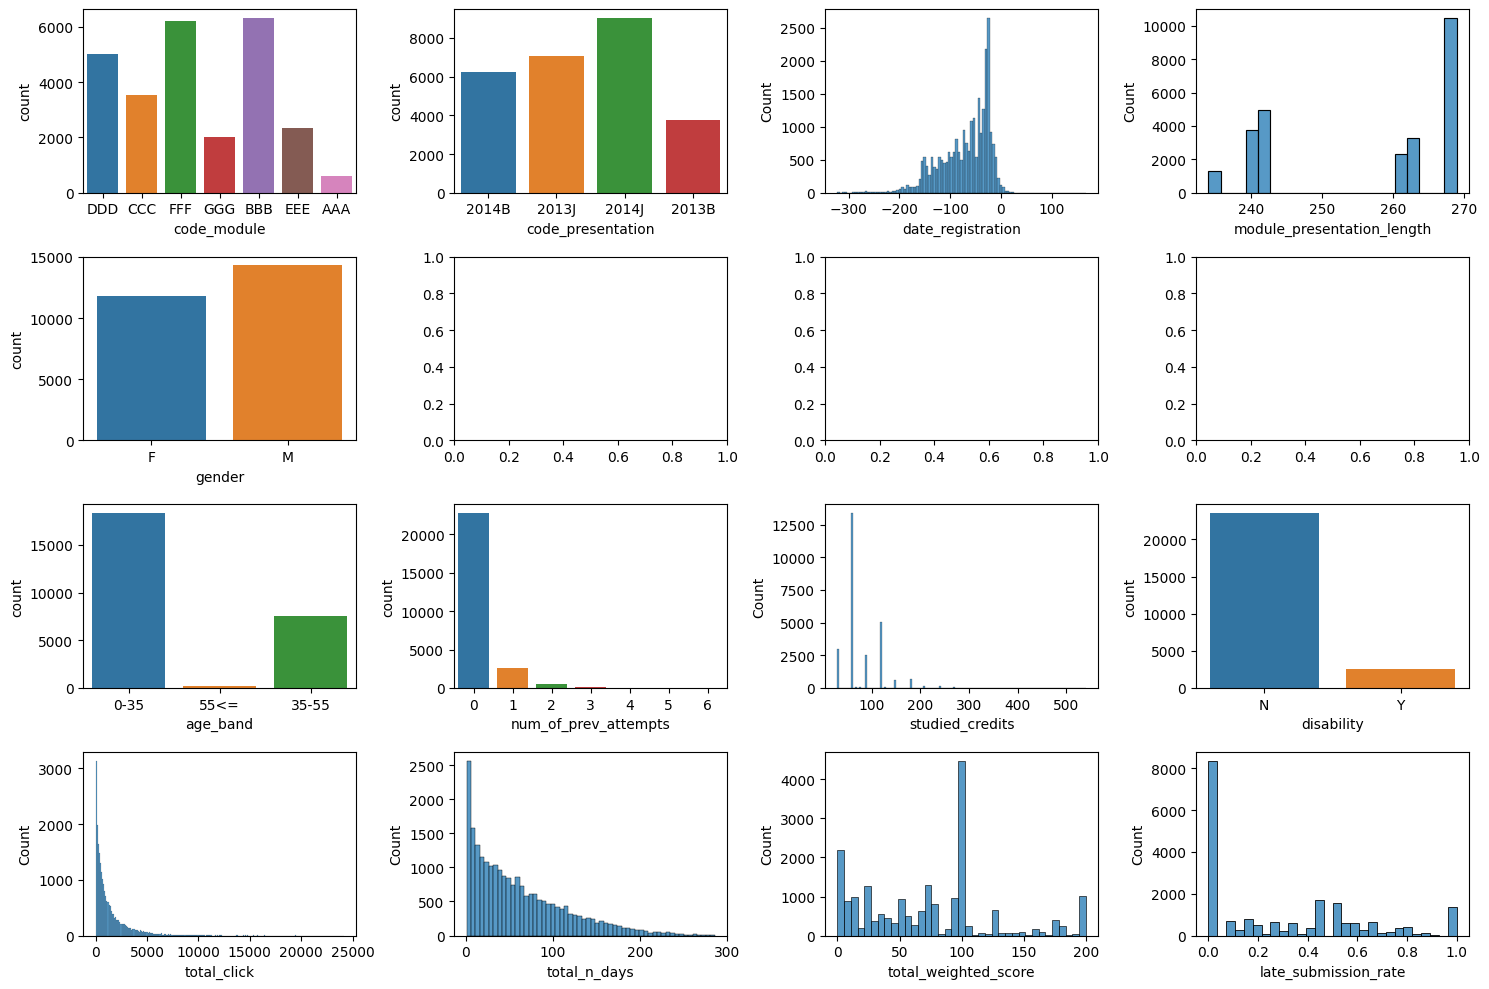

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

sns.countplot(data=train, x='code_module', ax=axes[0, 0])
sns.countplot(data=train, x='code_presentation', ax=axes[0, 1])
sns.histplot(data=train, x='date_registration', ax=axes[0, 2])
sns.histplot(data=train, x='module_presentation_length', ax=axes[0, 3])
sns.countplot(data=train, x='gender', ax=axes[1, 0])
sns.countplot(data=train, x='age_band', ax=axes[2, 0])
sns.countplot(data=train, x='num_of_prev_attempts', ax=axes[2, 1])
sns.histplot(data=train, x='studied_credits', ax=axes[2, 2])
sns.countplot(data=train, x='disability', ax=axes[2, 3])
sns.histplot(data=train, x='total_click', ax=axes[3, 0])
sns.histplot(data=train, x='total_n_days', ax=axes[3, 1])
sns.histplot(data=train, x='total_weighted_score', ax=axes[3, 2])
sns.histplot(data=train, x='late_submission_rate', ax=axes[3, 3])

plt.tight_layout()
plt.show()

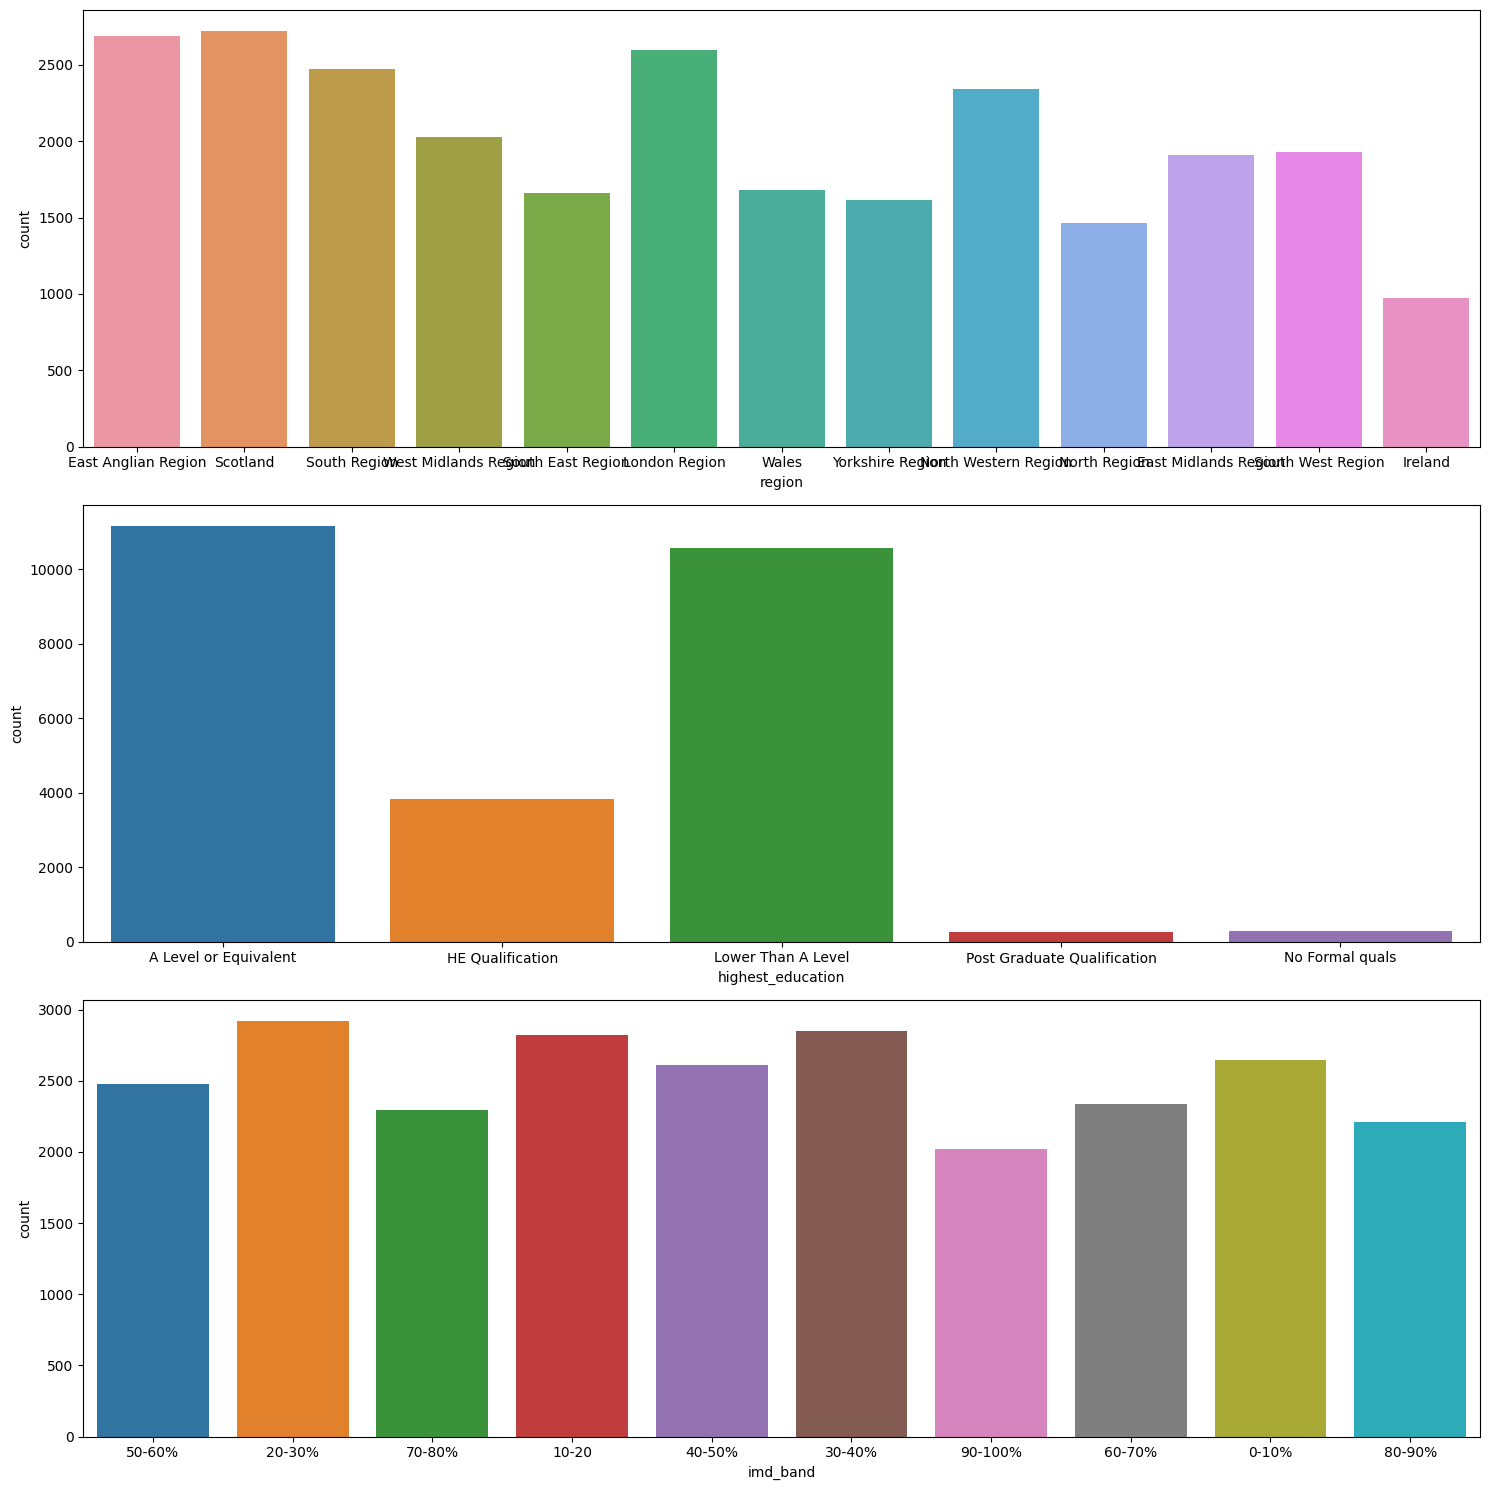

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

sns.countplot(data=train, x='region', ax=axes[0])
sns.countplot(data=train, x='highest_education', ax=axes[1])
sns.countplot(data=train, x='imd_band', ax=axes[2])

plt.tight_layout()
plt.show()

<Axes: >

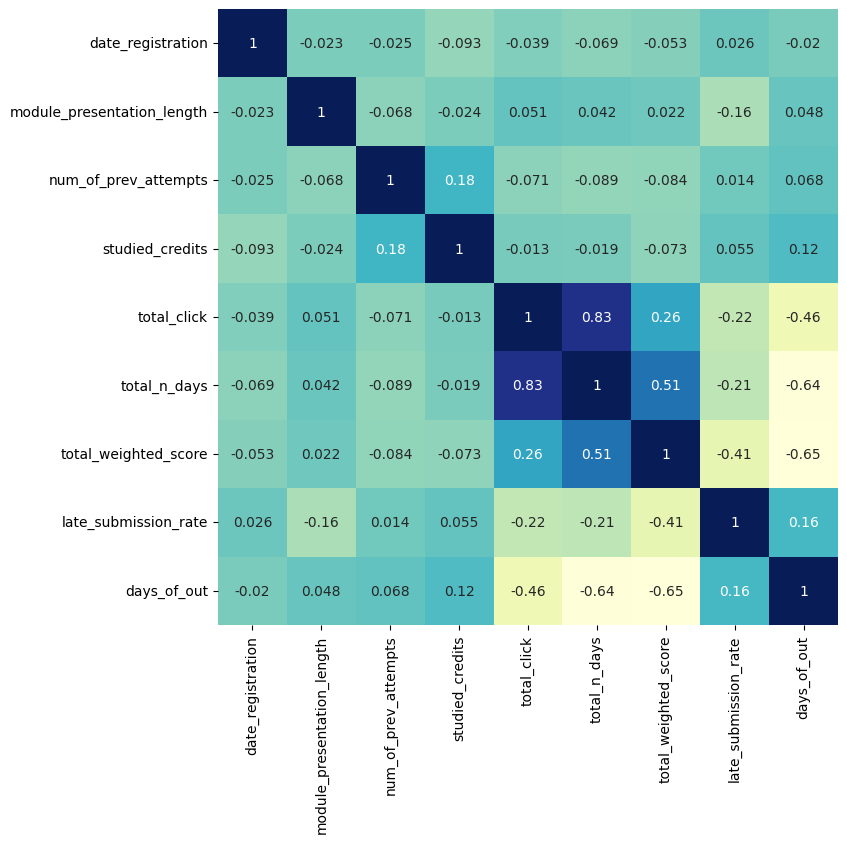

In [ ]:
# вероятно в colab более старый pandas
# в vs code надо добавить numeric_only=True
corr = train.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)

Выводы:

* code_module — распределен не равномерно, малое количество студентов на модуле с кодом ААА;
* code_presentation — больше всего студентов зарегестрировалось во втором семестре 2014 года, меньше всего в 2013 первом семестре, данные распредлены не равномерно;
* date_registration — большинство студентов было зарегестрировано заранее;
* module_presentation_length — распределены не равномерно, в среднем 256 дней;
* gender — пол распределен примерно одинаково;
* highest_education — очень мало студенов без образлование No Formal quals и с Post Graduate Qualification, объеденим их с другими группами;
* imd_band — распредление нормальное, сказать нечего;
* age_band — очень мало студентов от 55<=, объеденим с 35-55;
* num_of_prev_attempts — большинства 0 попыток;
* studied_credits — распределн не равномерно;
* disability — инвалидов очень мало;
* total_click — коррелирует с общим количеством дней обучения total_n_days (если бы здесь был Святослав Игоревич, он бы спросил про p-value);
* total_weighted_score — средняя корреляция с общим количством дней обучения total_n_days, слабая с количеством кликов, слабая отрицательная с задержкой сдачи.

# Сохраняем датафреймы

In [73]:
train.to_csv('../../data/baselines/train.csv')
test.to_csv('../../data/baselines/test.csv')

In [ ]:
raise

# Замена пропусков

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           26037 non-null  float64
 3   module_presentation_length  26074 non-null  int64  
 4   gender                      26074 non-null  object 
 5   region                      26074 non-null  object 
 6   highest_education           26074 non-null  object 
 7   imd_band                    25187 non-null  object 
 8   age_band                    26074 non-null  object 
 9   num_of_prev_attempts        26074 non-null  int64  
 10  studied_credits             26074 non-null  int64  
 11  disability                  26074 non-null  object 
 12  total_click                 23364 non-null  float64
 13  total_n_days                233

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6519 entries, 26074 to 32592
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 6519 non-null   object 
 1   code_presentation           6519 non-null   object 
 2   date_registration           6511 non-null   float64
 3   module_presentation_length  6519 non-null   int64  
 4   gender                      6519 non-null   object 
 5   region                      6519 non-null   object 
 6   highest_education           6519 non-null   object 
 7   imd_band                    6295 non-null   object 
 8   age_band                    6519 non-null   object 
 9   num_of_prev_attempts        6519 non-null   int64  
 10  studied_credits             6519 non-null   int64  
 11  disability                  6519 non-null   object 
 12  total_click                 5864 non-null   float64
 13  total_n_days                

Заменим все нулевые значения соответствующими наиболее часто встречающимися значениями imd_bands.

In [ ]:
regions_list = list(train[train['imd_band'].isnull()]['region'].unique())

for i in regions_list:
    train['imd_band'] = np.where(((train['imd_band'].isnull()) & (train['region'] == i) ),train[train['region'] == i].imd_band.mode(),train['imd_band'])

regions_list = list(test[test['imd_band'].isnull()]['region'].unique())

for i in regions_list:
    test['imd_band'] = np.where(((test['imd_band'].isnull()) & (test['region'] == i) ),test[test['region'] == i].imd_band.mode(),test['imd_band'])

In [ ]:
train['total_click'] = train['total_click'].replace(np.nan).fillna(0)
test['total_click'] = test['total_click'].replace(np.nan).fillna(0)

train['date_registration'].fillna(train['date_registration'].median(), inplace=True)
test['date_registration'].fillna(test['date_registration'].median(), inplace=True)

train['total_n_days'].fillna(train['total_n_days'].median(), inplace=True)
test['total_n_days'].fillna(test['total_n_days'].median(), inplace=True)

train['late_submission_rate'] = train['late_submission_rate'].replace(np.nan).fillna(1.0)
test['late_submission_rate'] = test['late_submission_rate'].replace(np.nan).fillna(1.0)

train['total_weighted_score'].fillna(train['total_weighted_score'].median(), inplace=True)
test['total_weighted_score'].fillna(test['total_weighted_score'].median(), inplace=True)

train['days_of_out'].fillna(train['days_of_out'].median(), inplace=True)
test['days_of_out'].fillna(test['days_of_out'].median(), inplace=True)

train['late_submission'] = train['days_of_out'] <= 0
test['late_submission'] = test['days_of_out'] <= 0

Объеденим уровень образования

In [ ]:

train['highest_education'] = np.where( (train['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           train['highest_education']
                                    )

train['highest_education'] = np.where( (train['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           train['highest_education']
                                    )


test['highest_education'] = np.where( (test['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           test['highest_education']
                                    )

test['highest_education'] = np.where( (test['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           test['highest_education']
                                    )

Объеденим 55+ и 35-55 в 35+

In [ ]:
train['age_band'] = np.where( (train['age_band'] == '55<='),
                                           '35+',
                                           train['age_band']
                                    )

train['age_band'] = np.where( (train['age_band'] == '35-55'),
                                           '35+',
                                           train['age_band']
                                    )

test['age_band'] = np.where( (test['age_band'] == '55<='),
                                           '35+',
                                           test['age_band']
                                    )

test['age_band'] = np.where( (test['age_band'] == '35-55'),
                                           '35+',
                                           test['age_band']
                                    )

# Пробуем различные модели

## Предобработка через Pipeline

С помощью ранее заготовленного метода получим имена категориальных и числовых колонок.

In [ ]:
cat_cols, num_cols = get_cat_num_cols(train)

categorical columns:	  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'late_submission_vle'] 
 len =  9
numerical columns:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'total_click', 'total_n_days', 'total_weighted_score', 'late_submission_rate', 'days_of_out', 'late_submission'] 
 len =  10


Используем Pipeline

In [ ]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scki-kit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных (вставление пропусков + нормализация)

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

Предобработка категориальных данных (вставление пропусков + One-Hot кодирование)

In [ ]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам". Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [ ]:
preprocessors.fit(train)

X_train = preprocessors.transform(train)
X_test = preprocessors.transform(test)

X_train.shape

(26074, 51)

## Пробуем модели

Попробуем подобрать параметры для простых моделей через GridSearchCV

In [ ]:
# модели для перебора
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, train_test_split

Поделим обучающую выборку на обучающую и тестовую в отношении 8 к 2

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, target, test_size=0.2, random_state=42)

Для каждого экземпляра модели пропишем словарь гиперпараметров, которые переберет GridSearch

Необходимо заварить чаю и подождать...

In [ ]:
raise Exception('этот raise неспроста) он нужен, чтобы не перебирать все модели после полного перезапуска блокнота')

In [ ]:
pipe = Pipeline([("regressor", LinearRegression())])

search_space = [
                {"regressor": [Ridge()],#                                                       <=== Экземпляр модели, для которой перебираем
                 "regressor__alpha": np.linspace(0.01, 1, 10),#                                 ⎤
                 "regressor__fit_intercept": [True, False],#                                    ⎥ <= Гиперпараметры и их значения для перебора
                 "regressor__solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],# ⎥
                 "regressor__random_state":[42]},#                                              ⎦
                {"regressor": [Lasso()],
                 "regressor__alpha": np.linspace(0.01, 1, 10),
                 "regressor__selection": ['cyclic', 'random'],
                 "regressor__random_state": [42]},
                {"regressor": [SGDRegressor()],
                 "regressor__alpha": np.linspace(0.01, 1, 10),
                 "regressor__penalty": ['l2', 'l1'],
                 "regressor__random_state": [42],
                 "regressor__learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive']},
                {"regressor": [SVR()],
                 "regressor__kernel": ["linear", "poly", "rbf", "sigmoid"],
                 "regressor__C": np.linspace(0.01, 1, 10),
                 "regressor__gamma": ['scale', 'auto']},
                ]

# nproc говорит что под блокнот в colab выделено пара ядер какого-то Xeon, но локальный запуск все равно вышел быстрее
grid_search = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
best_model = grid_search.fit(X_train_temp, y_train_temp)

print(best_model.best_params_)
# там mse с минусом
print(-1 * best_model.best_score_)

Отдельно обучим лучшую модель и поглядим на метрики

In [ ]:
best_model = Ridge(alpha=0.45, random_state=42, solver='sag')
best_model.fit(X_train_temp, y_train_temp)
# заранее заготовленный метод
get_metrics(best_model, X_train_temp, y_train_temp, X_test_temp, y_test_temp)

MSE train: 376.6365865251536
MSE test: 385.3083448464096
R2 train: 0.5725718594757443
R2 test: 0.5684285527322168


Результаты не очень хорошие. За кадром коковырял каждую модель и mse получилась 370-390.

Нужно попробовать другие модели.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor

In [ ]:
raise Exception('этот raise неспроста) он нужен, чтобы не перебирать все модели после полного перезапуска блокнота')

Попробуем другие модели. ~~На ожидание понадобится целый термос~~

In [ ]:
pipe = Pipeline([("regressor", DecisionTreeRegressor())])

search_space = [
                {
                 "regressor": [DecisionTreeRegressor()],
                 "regressor__max_depth": np.arange(10, 13),
                 "regressor__min_samples_split": np.arange(80, 95),
                 "regressor__min_samples_leaf": np.arange(6, 12),
                 "regressor__random_state":[42]
                 },
                {
                 "regressor": [GradientBoostingRegressor()],
                 "regressor__max_depth": np.arange(5, 8),
                 "regressor__learning_rate": np.linspace(0.01, 0.5, 5),
                 "regressor__min_samples_leaf": np.arange(18, 20),
                 "regressor__random_state":[42]
                 },
                {
                 "regressor": [RandomForestRegressor()],
                 "regressor__n_estimators": np.arange(100, 500, 100),
                 "regressor__max_depth": np.arange(12, 16),
                 "regressor__n_jobs": [-1],
                 "regressor__random_state":[42]
                 },
                {
                 "regressor": [HistGradientBoostingRegressor()],
                 "regressor__l2_regularization": np.linspace(0.2, 0.4, 5),
                 "regressor__learning_rate": np.linspace(0.01, 0.06, 6),
                 "regressor__max_iter": np.arange(1100, 1400, 100),
                 "regressor__max_leaf_nodes": np.arange(60, 70),
                 "regressor__random_state":[42]
                 }
                ]

grid_search = GridSearchCV(pipe, search_space[3:4], cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
best_model = grid_search.fit(X_train_temp, y_train_temp)

print(best_model.best_params_)
# там mse с минусом
print(-1 * best_model.best_score_)

При локальном запуске я проверял каждую модель по отдельности, на выполнение ячейки целиком потребовалось много терпения...

Некоторые из полученных в ходе экспериментов моделей:

`{'regressor': DecisionTreeRegressor(max_depth=11, min_samples_leaf=7, min_samples_split=92,
                      random_state=42), 'regressor__max_depth': 11, 'regressor__min_samples_leaf': 7, 'regressor__min_samples_split': 92, 'regressor__random_state': 42}
228.24369724843922`

`{'regressor': GradientBoostingRegressor(learning_rate=0.1325, max_depth=6,
                          min_samples_leaf=19), 'regressor__learning_rate': 0.1325, 'regressor__max_depth': 6, 'regressor__min_samples_leaf': 19}
208.8973448865379`

`{'regressor': RandomForestRegressor(max_depth=13, n_estimators=300, n_jobs=-1), 'regressor__max_depth': 13, 'regressor__n_estimators': 300, 'regressor__n_jobs': -1}
208.25695739428483`

`{'regressor': HistGradientBoostingRegressor(l2_regularization=0.2,
                              learning_rate=0.039999999999999994, max_iter=1100,
                              max_leaf_nodes=60), 'regressor__l2_regularization': 0.2, 'regressor__learning_rate': 0.039999999999999994, 'regressor__max_iter': 1100, 'regressor__max_leaf_nodes': 60}
208.29779085015056`

Отдельно обучим лучшую модель и поглядим на метрики

In [ ]:
best_model = HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.04, max_iter=1100, max_leaf_nodes=60, random_state=42)
best_model.fit(X_train_temp, y_train_temp)
get_metrics(best_model, X_train_temp, y_train_temp, X_test_temp, y_test_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 169.79450306471082
MSE test: 211.54443901397707
R2 train: 0.807307756833277
R2 test: 0.7630558981454043


Данный результат устраивает меня больше, чем предыдущий.

Обучим модель на всем train.

In [ ]:
best_model.fit(X_train, target)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.04,
                              max_iter=1100, max_leaf_nodes=60,
                              random_state=42)

Сделаем предсказание и поместим в соответствующий столбец в submission

In [ ]:
predict = best_model.predict(X_test)
submission['weighted_score'] = predict
submission

,weighted_score
ID,
26074,47.810307
26075,45.731483
26076,47.990879
26077,1.668767
26078,7.721189
...,...
32588,4.187950
32589,4.857718
32590,71.326644


# Загрузка ответа

In [ ]:
raise Exception('этот raise неспроста) он нужен, чтобы не отправлять резултаты на каггл после полного перезапуска блокнота (число попыток в сутки ограничено)')

Сохраняем файл с ранее записанными предсказаниями

In [ ]:
submission.to_csv('/content/Submission.csv',index=True)

Отправляем ~~в пешее...~~ в каггл

In [ ]:
!kaggle competitions submit -c urfuaieng2022reg2 -f Submission.csv -m "test"

100% 154k/154k [00:01<00:00, 97.2kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Reg_2

Результат на каггл:

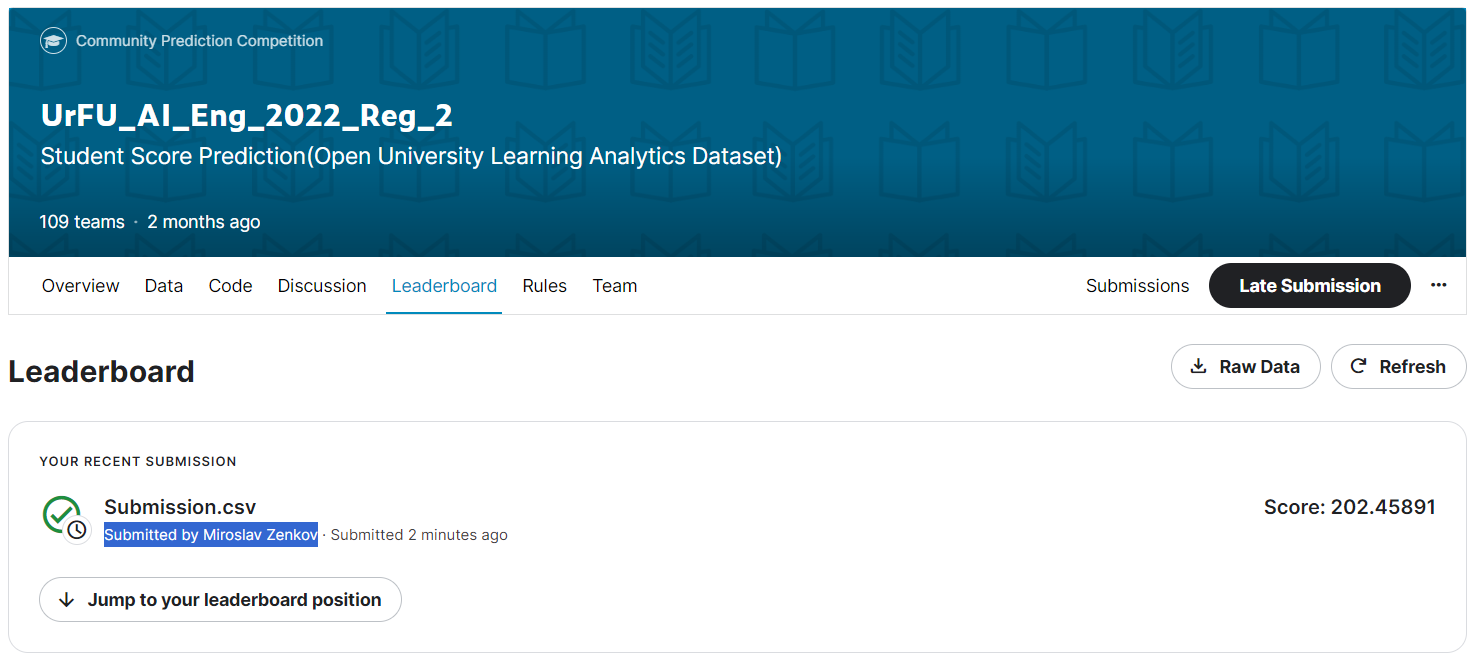